In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm 
from PIL import Image, ImageOps

from keras.layers import Input
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.layers import Convolution2D,BatchNormalization
from keras.layers import GlobalAveragePooling2D,MaxPooling2D
from keras.layers import Dense,Flatten,Dropout 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import History
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_folder=r'/content/drive/MyDrive/preprocessed_train_images'

image_size = (256,256) 
inputShape=(256,256,3)
num_classes = 5 

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_folder,
                                                 image_size,
                                                 batch_size=16,
                                                 class_mode = 'categorical',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory(train_folder,
                                                  image_size,
                                                  batch_size=16, 
                                                  class_mode = 'categorical',
                                                  subset='validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
def plot_model_history(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def trainNet(training_set, validation_set):
    #model = buildNet(num_classes)
    history = History()

    model_save = ModelCheckpoint('/content/drive/MyDrive/model_vgg16.h5',
                                save_best_only = True,
                                save_weights_only = False,
                                monitor = 'val_loss', 
                                mode = 'min', verbose = 1)
    
    lr = ReduceLROnPlateau(monitor = 'val_loss',
                              patience = 3,
                              verbose = 1,
                              mode='auto',
                              factor=0.25,
                              min_lr=0.000001)

    history = model.fit(training_set,
                        epochs = 10,
                        validation_data = validation_set,
                        callbacks = [model_save,lr])
    
    plot_model_history(history)
    return history

# **Implementing on MobileNet**

In [ ]:
from keras.applications.mobilenet import MobileNet

In [ ]:
def define_Mobilenet():
    mobilenet = MobileNet(weights= "imagenet", include_top=False, input_shape= (256,256,3))  
    model = Sequential()
    model.add(mobilenet)
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(5, activation = 'softmax')) 
    opt = Adam(learning_rate=0.00005) 
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [ ]:
model=define_Mobilenet() 
model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 512)               33554944  
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 36,786,373
Trainable params: 36,764,485
Non-trainable params: 21,888
_________________________________________________________________


Epoch 1/10
184/184 [==============================] - ETA: 0s - loss: 0.4893 - accuracy: 0.8318
Epoch 1: val_loss improved from inf to 0.87836, saving model to /content/drive/MyDrive/model_mobilenet.h5
184/184 [==============================] - 464s 3s/step - loss: 0.4893 - accuracy: 0.8318 - val_loss: 0.8784 - val_accuracy: 0.7442 - lr: 5.0000e-05
Epoch 2/10
184/184 [==============================] - ETA: 0s - loss: 0.4145 - accuracy: 0.8536
Epoch 2: val_loss improved from 0.87836 to 0.84339, saving model to /content/drive/MyDrive/model_mobilenet.h5
184/184 [==============================] - 41s 220ms/step - loss: 0.4145 - accuracy: 0.8536 - val_loss: 0.8434 - val_accuracy: 0.7606 - lr: 5.0000e-05
Epoch 3/10
184/184 [==============================] - ETA: 0s - loss: 0.2764 - accuracy: 0.9137
Epoch 3: val_loss improved from 0.84339 to 0.80028, saving model to /content/drive/MyDrive/model_mobilenet.h5
184/184 [==============================] - 40s 219ms/step - loss: 0.2764 - accuracy: 0

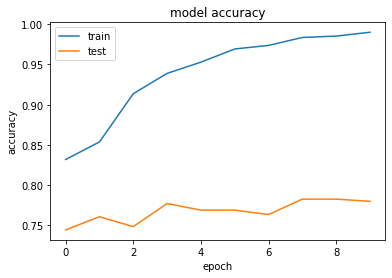

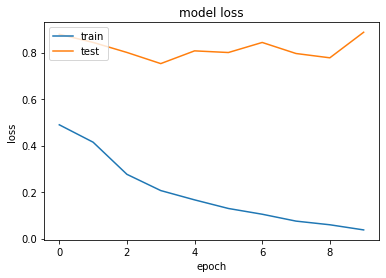

In [ ]:
history = trainNet(training_set=training_set, validation_set=validation_set)

# **Implenting on MobileNetV2**

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2 

In [ ]:
def define_MobilenetV2():
    mobilenetv2 = MobileNetV2(weights= "imagenet", include_top=False, input_shape= (256,256,3))  
    model = Sequential()
    model.add(mobilenetv2)
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(5, activation = 'softmax')) 
    opt = Adam(learning_rate=0.00005) 
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [ ]:
model=define_MobilenetV2() 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 81920)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               41943552  
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 44,204,101
Trainable params: 44,169,989
Non-trainable params: 34,112
_________________________________________________________________


Epoch 1/10
184/184 [==============================] - ETA: 0s - loss: 1.0427 - accuracy: 0.6789
Epoch 1: val_loss improved from inf to 1.42527, saving model to /content/drive/MyDrive/model_mobilenetv2.h5
184/184 [==============================] - 44s 217ms/step - loss: 1.0427 - accuracy: 0.6789 - val_loss: 1.4253 - val_accuracy: 0.6320 - lr: 5.0000e-05
Epoch 2/10
184/184 [==============================] - ETA: 0s - loss: 0.5243 - accuracy: 0.8144
Epoch 2: val_loss did not improve from 1.42527
184/184 [==============================] - 37s 201ms/step - loss: 0.5243 - accuracy: 0.8144 - val_loss: 1.7943 - val_accuracy: 0.6566 - lr: 5.0000e-05
Epoch 3/10
184/184 [==============================] - ETA: 0s - loss: 0.3937 - accuracy: 0.8649
Epoch 3: val_loss did not improve from 1.42527
184/184 [==============================] - 36s 196ms/step - loss: 0.3937 - accuracy: 0.8649 - val_loss: 2.0403 - val_accuracy: 0.6088 - lr: 5.0000e-05
Epoch 4/10
184/184 [==============================] - ETA

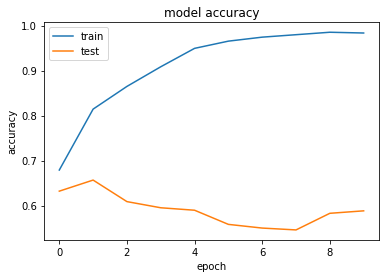

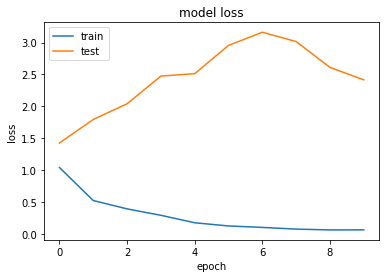

In [ ]:
history = trainNet(training_set=training_set, validation_set=validation_set)

# **Implenting on ResNet**

In [ ]:
from keras.applications.resnet import ResNet

In [ ]:
def define_ResNet():
    resnet = ResNet(weights= "imagenet", include_top=False, input_shape= (256,256,3))  
    model = Sequential()
    model.add(resnet)
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(5, activation = 'softmax')) 
    opt = Adam(learning_rate=0.00005) 
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [ ]:
model=define_MobilenetV2() 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 81920)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               41943552  
                                                                 
 dense_7 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 44,204,101
Trainable params: 44,169,989
Non-trainable params: 34,112
_________________________________________________________________


Epoch 1/10
184/184 [==============================] - ETA: 0s - loss: 1.0580 - accuracy: 0.6830
Epoch 1: val_loss improved from inf to 1.83551, saving model to /content/drive/MyDrive/model_resnet.h5
184/184 [==============================] - 45s 221ms/step - loss: 1.0580 - accuracy: 0.6830 - val_loss: 1.8355 - val_accuracy: 0.3967 - lr: 5.0000e-05
Epoch 2/10
184/184 [==============================] - ETA: 0s - loss: 0.5229 - accuracy: 0.8096
Epoch 2: val_loss did not improve from 1.83551
184/184 [==============================] - 38s 203ms/step - loss: 0.5229 - accuracy: 0.8096 - val_loss: 2.0882 - val_accuracy: 0.3748 - lr: 5.0000e-05
Epoch 3/10
184/184 [==============================] - ETA: 0s - loss: 0.3795 - accuracy: 0.8772
Epoch 3: val_loss improved from 1.83551 to 1.58045, saving model to /content/drive/MyDrive/model_resnet.h5
184/184 [==============================] - 42s 226ms/step - loss: 0.3795 - accuracy: 0.8772 - val_loss: 1.5804 - val_accuracy: 0.6005 - lr: 5.0000e-05
Ep

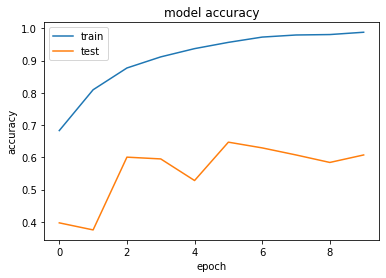

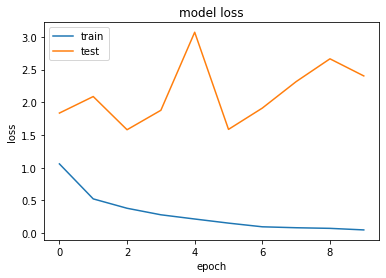

In [ ]:
history = trainNet(training_set=training_set, validation_set=validation_set)

# **Implenting on InceptionResNetV2**

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [ ]:
def define_InceptionResNetV2():
    incresnetv2 = InceptionResNetV2(weights= "imagenet", include_top=False, input_shape= (256,256,3))  
    model = Sequential()
    model.add(incresnetv2)
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(5, activation = 'softmax')) 
    opt = Adam(learning_rate=0.00005) 
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [ ]:
model=define_MobilenetV2() 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 81920)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               41943552  
                                                                 
 dense_9 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 44,204,101
Trainable params: 44,169,989
Non-trainable params: 34,112
_________________________________________________________________


Epoch 1/10
184/184 [==============================] - ETA: 0s - loss: 1.1057 - accuracy: 0.6639
Epoch 1: val_loss improved from inf to 1.09796, saving model to /content/drive/MyDrive/model_inceptionresnetv2.h5
184/184 [==============================] - 44s 213ms/step - loss: 1.1057 - accuracy: 0.6639 - val_loss: 1.0980 - val_accuracy: 0.5896 - lr: 5.0000e-05
Epoch 2/10
184/184 [==============================] - ETA: 0s - loss: 0.5546 - accuracy: 0.8076
Epoch 2: val_loss did not improve from 1.09796
184/184 [==============================] - 37s 203ms/step - loss: 0.5546 - accuracy: 0.8076 - val_loss: 2.0087 - val_accuracy: 0.3762 - lr: 5.0000e-05
Epoch 3/10
184/184 [==============================] - ETA: 0s - loss: 0.3917 - accuracy: 0.8727
Epoch 3: val_loss did not improve from 1.09796
184/184 [==============================] - 37s 200ms/step - loss: 0.3917 - accuracy: 0.8727 - val_loss: 1.8557 - val_accuracy: 0.4679 - lr: 5.0000e-05
Epoch 4/10
184/184 [==============================]

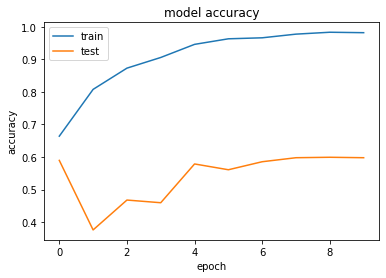

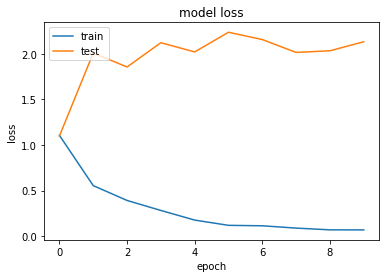

In [ ]:
history = trainNet(training_set=training_set, validation_set=validation_set)

# **Implenting on VGG16**

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
def define_VGG16():
    vgg16 = VGG16(weights= "imagenet", include_top=False, input_shape= (256,256,3))  
    model = Sequential()
    model.add(vgg16)
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(5, activation = 'softmax')) 
    opt = Adam(learning_rate=0.00005) 
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [ ]:
model=define_MobilenetV2() 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 81920)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               41943552  
                                                                 
 dense_11 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 44,204,101
Trainable params: 44,169,989
Non-trainable params: 34,112
_________________________________________________________________


Epoch 1/10
184/184 [==============================] - ETA: 0s - loss: 1.0217 - accuracy: 0.6721
Epoch 1: val_loss improved from inf to 1.62725, saving model to /content/drive/MyDrive/model_vgg16.h5
184/184 [==============================] - 44s 217ms/step - loss: 1.0217 - accuracy: 0.6721 - val_loss: 1.6272 - val_accuracy: 0.5198 - lr: 5.0000e-05
Epoch 2/10
184/184 [==============================] - ETA: 0s - loss: 0.5157 - accuracy: 0.8216
Epoch 2: val_loss did not improve from 1.62725
184/184 [==============================] - 37s 201ms/step - loss: 0.5157 - accuracy: 0.8216 - val_loss: 2.0141 - val_accuracy: 0.5691 - lr: 5.0000e-05
Epoch 3/10
184/184 [==============================] - ETA: 0s - loss: 0.3903 - accuracy: 0.8663
Epoch 3: val_loss did not improve from 1.62725
184/184 [==============================] - 38s 207ms/step - loss: 0.3903 - accuracy: 0.8663 - val_loss: 1.9317 - val_accuracy: 0.5595 - lr: 5.0000e-05
Epoch 4/10
184/184 [==============================] - ETA: 0s -

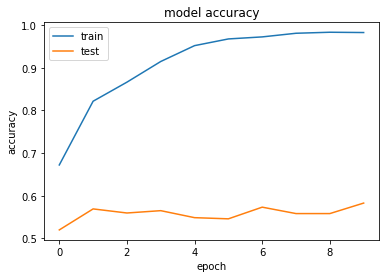

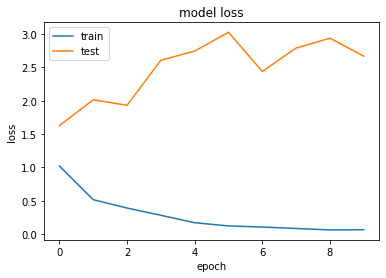

In [ ]:
history = trainNet(training_set=training_set, validation_set=validation_set)